# Games FPS Prediction  with  Scikit-Learn MLP Regressor

In [1]:
import pyforest

* data source : https://www.openml.org/d/42737

In [2]:
df=pd.read_csv("fps-in-video-games.csv")
#df = pd.read_csv("https://www.openml.org/data/get_csv/22044773/fps-in-video-games.arff")

<IPython.core.display.Javascript object>

C:\Users\NIO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (6,17,22,25,26,27,29,34,35,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,CpuName,CpuNumberOfCores,CpuNumberOfThreads,CpuBaseClock,CpuCacheL1,CpuCacheL2,CpuCacheL3,CpuDieSize,CpuFrequency,CpuMultiplier,...,GpuNumberOfShadingUnits,GpuNumberOfTMUs,GpuTextureRate,GpuNumberOfTransistors,GpuVulkan,GameName,GameResolution,GameSetting,Dataset,FPS
0,'Intel Core i7-920',4,8,133,256,1024,8,0.000263,2666,20.0,...,2304,144,182300,5700,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,70.0
1,'Intel Core i7-920',4,8,133,256,1024,8,0.000263,2666,20.0,...,2304,144,182300,5700,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,230.0
2,'Intel Core i5-4690',4,4,100,256,1024,6,0.000177,3400,34.0,...,2560,160,277300,7200,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,250.0
3,'Intel Core i5-4690',4,4,100,256,1024,6,0.000177,3400,34.0,...,2560,160,277300,7200,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,300.0
4,'Intel Core i5-4690',4,4,100,256,1024,6,0.000177,3400,34.0,...,896,56,61600,2080,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,200.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425833 entries, 0 to 425832
Data columns (total 45 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CpuName                    425833 non-null  object 
 1   CpuNumberOfCores           425833 non-null  int64  
 2   CpuNumberOfThreads         425833 non-null  int64  
 3   CpuBaseClock               425833 non-null  int64  
 4   CpuCacheL1                 425833 non-null  int64  
 5   CpuCacheL2                 425833 non-null  int64  
 6   CpuCacheL3                 425833 non-null  object 
 7   CpuDieSize                 425833 non-null  object 
 8   CpuFrequency               425833 non-null  int64  
 9   CpuMultiplier              425833 non-null  float64
 10  CpuMultiplierUnlocked      425833 non-null  int64  
 11  CpuProcessSize             425833 non-null  int64  
 12  CpuTDP                     425833 non-null  int64  
 13  CpuNumberOfTransistors     42

# EDA 

In [5]:
df.isnull().sum().any()

False

In [6]:
df.columns = df.columns.str.lower().str.strip()

In [7]:
df.cpucachel3.unique()

array([8, 6, 9, 12, '8', '4', '32', '16', '24', '19', '14', '3', '6', '?',
       '12', '15', '10', '2', '64', '9', '20', '22', '11', '25', 4, 32,
       16, 3, 64], dtype=object)

In [8]:
mixed_type_cols = df.columns[[6,17,22,25,26,27,29,34,35,38]]

mixed_type_cols

Index(['cpucachel3', 'gpubandwidth', 'gpudiesize', 'gpufp32performance',
       'gpumemorybus', 'gpumemorysize', 'gpuopencl', 'gpushadermodel',
       'gpunumberofshadingunits', 'gpunumberoftransistors'],
      dtype='object')

In [9]:
for col in mixed_type_cols:
    print(df[col].dtype)
    print(col,"\n",df[col].unique(),"\n")

object
cpucachel3 
 [8 6 9 12 '8' '4' '32' '16' '24' '19' '14' '3' '6' '?' '12' '15' '10' '2'
 '64' '9' '20' '22' '11' '25' 4 32 16 3 64] 

object
gpubandwidth 
 ['256000' '352300' '104000' '288000' '105800' '224400' '256300' '84100'
 '176000' '144200' '320000' '112100' '192300' '216700' '182400' '76800'
 '192400' '179200' '240000' '115200' '128000' '112900' '288400' '512000'
 '80000' '211200' '86400' '134400' '14400' '80190' '98500' '7200' '48060'
 '64000' '40060' '153600' '?' '96000' '448000' '224000' '336600' '336000'
 '484400' '112000' '160000' '28800' '384000' '616000' '495900' '81600'
 '152000' '192100' '25600' '13200' '12800' '57600' '89860' '72000' '8528'
 '32000' '409600' '483800' '56000' '1024000' '547600' '54400' '6400'
 '21340' '25280' '22400' '57730' '108800' '6336' '96190' '41600' '73600'
 '120000' '64130' '32030' '64190' '16130' '10480' '70400' '11200' '133900'
 '28510' '63360' '60000' '40100' '16020' '264000' '51200' '8064' '5328'
 '4256' '40000' '217000' '20800' '15900

In [10]:
df1 = df.replace("?",np.nan)

<IPython.core.display.Javascript object>

In [11]:
df1.isnull().sum()

cpuname                           0
cpunumberofcores                  0
cpunumberofthreads                0
cpubaseclock                      0
cpucachel1                        0
cpucachel2                        0
cpucachel3                     5055
cpudiesize                   202534
cpufrequency                      0
cpumultiplier                     0
cpumultiplierunlocked             0
cpuprocesssize                    0
cputdp                            0
cpunumberoftransistors       226039
cputurboclock                     0
gpuname                           0
gpuarchitecture                   0
gpubandwidth                  15441
gpubaseclock                      0
gpuboostclock                     0
gpubus nterface                   0
gpunumberofcomputeunits      357107
gpudiesize                    11196
gpudirectx                        0
gpunumberofexecutionunits    412935
gpufp32performance               56
gpumemorybus                  15441
gpumemorysize               

In [12]:
df2 = df1.dropna(axis=1,thresh=(df.shape[0]*.7)).copy()
df2.head()

,cpuname,cpunumberofcores,cpunumberofthreads,cpubaseclock,cpucachel1,cpucachel2,cpucachel3,cpufrequency,cpumultiplier,cpumultiplierunlocked,...,gpunumberofshadingunits,gpunumberoftmus,gputexturerate,gpunumberoftransistors,gpuvulkan,gamename,gameresolution,gamesetting,dataset,fps
0,'Intel Core i7-920',4,8,133,256,1024,8,2666,20.0,0,...,2304,144,182300,5700,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,70.0
1,'Intel Core i7-920',4,8,133,256,1024,8,2666,20.0,0,...,2304,144,182300,5700,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,230.0
2,'Intel Core i5-4690',4,4,100,256,1024,6,3400,34.0,0,...,2560,160,277300,7200,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,250.0
3,'Intel Core i5-4690',4,4,100,256,1024,6,3400,34.0,0,...,2560,160,277300,7200,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,300.0
4,'Intel Core i5-4690',4,4,100,256,1024,6,3400,34.0,0,...,896,56,61600,2080,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,200.0


In [13]:
df2.shape

(425833, 41)

In [14]:
df2.dropna().shape

(396028, 41)

In [15]:
df2.groupby("cpuname")["cpucachel3"].value_counts(dropna=False)

cpuname                       cpucachel3
'AMD A4-5150M'                NaN             4
'AMD A6-5350M'                NaN            34
'AMD Athlon 200GE'            4              97
'AMD Athlon 240GE'            4               1
'AMD Athlon 64 3000+'         NaN             2
                                           ... 
'Intel Pentium Gold G5400'    4             192
'Intel Pentium Gold G5500'    4              15
'Intel Pentium Gold G5600'    4               6
'Intel Pentium P6200'         3               6
'Intel Pentium Silver J5005'  NaN             3
Name: cpucachel3, Length: 423, dtype: int64

In [16]:
df2.cpucachel3.fillna(0,inplace=True)

In [17]:
df2[(df2.cpucachel3 == 0)]["dataset"].unique()

array(['userbenchmark'], dtype=object)

In [18]:
df2[df2.gpunumberoftransistors.isnull()]["dataset"].unique()

array(['userbenchmark'], dtype=object)

In [19]:
df2[df2.gpumemorytype.isnull()]["dataset"].unique()

array(['userbenchmark'], dtype=object)

In [20]:
df2[df2.gpunumberofshadingunits.isnull()]["dataset"].unique()

array(['userbenchmark'], dtype=object)

In [21]:
df2.isnull().sum()

cpuname                        0
cpunumberofcores               0
cpunumberofthreads             0
cpubaseclock                   0
cpucachel1                     0
cpucachel2                     0
cpucachel3                     0
cpufrequency                   0
cpumultiplier                  0
cpumultiplierunlocked          0
cpuprocesssize                 0
cputdp                         0
cputurboclock                  0
gpuname                        0
gpuarchitecture                0
gpubandwidth               15441
gpubaseclock                   0
gpuboostclock                  0
gpubus nterface                0
gpudiesize                 11196
gpudirectx                     0
gpufp32performance            56
gpumemorybus               15441
gpumemorysize              15441
gpumemorytype              15441
gpuopencl                    177
gpuopengl                      0
gpupixelrate                   0
gpuprocesssize                 0
gpunumberofrops                0
gpushaderm

In [22]:
df2.dropna(axis=0, inplace=True)

In [23]:
df2.shape

(397989, 41)

In [24]:
df2.cpuname.unique()

array(["'Intel Core i7-920'", "'Intel Core i5-4690'",
       "'Intel Core i5-4570'", "'Intel Core i5-6600'",
       "'Intel Core i5-4590'", "'Intel Core i5-2400'",
       "'Intel Core i5-4440'", "'Intel Core i5-3470'",
       "'Intel Core i5-8600K'", "'Intel Core i5-8400'",
       "'Intel Core i5-2500K'", "'Intel Core i5-7500'",
       "'Intel Core i5-4670K'", "'Intel Core i5-7600K'",
       "'Intel Core i5-3570K'", "'Intel Core i5-6500'",
       "'Intel Core i5-7400'", "'Intel Core i5-6400'",
       "'Intel Core i5-4690K'", "'Intel Core i5-6600K'",
       "'Intel Core i7-9700K'", "'Intel Core i7-8750H'",
       "'Intel Core i7-8700'", "'Intel Core i7-2600K'",
       "'Intel Core i7-3770K'", "'Intel Core i7-4770'",
       "'Intel Core i7-2600'", "'Intel Core i7-7700'",
       "'Intel Core i7-4770K'", "'Intel Core i7-6700'",
       "'Intel Core i7-3770'", "'Intel Core i7-8700K'",
       "'Intel Core i7-4790'", "'Intel Core i7-6700K'",
       "'Intel Core i7-4790K'", "'Intel Core i7-7700

In [25]:
df2["cpuname"] = df2.cpuname.str.strip("'")

In [26]:
df2.gpuname.unique()
df2["gpuname"] = df2.gpuname.str.strip("'")

In [27]:
df2.value_counts("gpuname")

gpuname
NVIDIA GeForce GTX 1060 6 GB 9Gbps    58910
NVIDIA GeForce GTX 1070 GDDR5X        52516
NVIDIA GeForce GTX 1080 11Gbps        40840
NVIDIA GeForce GTX 1050 Ti            33420
NVIDIA GeForce GTX 970                26482
                                      ...  
AMD Radeon R9 M265X                       1
AMD FirePro M4150                         1
AMD Radeon HD 8670 OEM                    1
AMD Radeon HD 8870 OEM                    1
AMD FirePro W7000                         1
Length: 230, dtype: int64

In [28]:
df2.cpuname.nunique()

321

In [29]:
(df2.value_counts("cpuname")<=1000).sum()

251

In [30]:
df2.cpuname.str.extract("(Intel)")

,0
0,Intel
1,Intel
2,Intel
3,Intel
4,Intel
...,...
425828,NaN
425829,NaN
425830,NaN
425831,NaN


In [31]:
df2.cpuname.str.extract("(AMD)")

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
425828,AMD
425829,AMD
425830,AMD
425831,AMD


In [32]:
df2.cpuname.str.extract("(AMD)").fillna("Intel")

,0
0,Intel
1,Intel
2,Intel
3,Intel
4,Intel
...,...
425828,AMD
425829,AMD
425830,AMD
425831,AMD


In [33]:
df2["cpubrand"] = df2.cpuname.str.extract("(AMD)").fillna("Intel")

In [34]:
df2.gpuname.str.extract("(AMD)")

,0
0,AMD
1,AMD
2,NaN
3,NaN
4,AMD
...,...
425828,AMD
425829,AMD
425830,AMD
425831,AMD


In [35]:
df2.gpuname.str.extract("(NVIDIA)")

,0
0,NaN
1,NaN
2,NVIDIA
3,NVIDIA
4,NaN
...,...
425828,NaN
425829,NaN
425830,NaN
425831,NaN


In [36]:
df2["gpubrand"] = df2.gpuname.str.extract("(AMD)").fillna("NVIDIA")

In [37]:
df2

,cpuname,cpunumberofcores,cpunumberofthreads,cpubaseclock,cpucachel1,cpucachel2,cpucachel3,cpufrequency,cpumultiplier,cpumultiplierunlocked,...,gputexturerate,gpunumberoftransistors,gpuvulkan,gamename,gameresolution,gamesetting,dataset,fps,cpubrand,gpubrand
0,Intel Core i7-920,4,8,133,256,1024,8,2666,20.0,0,...,182300,5700,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,70.0,Intel,AMD
1,Intel Core i7-920,4,8,133,256,1024,8,2666,20.0,0,...,182300,5700,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,230.0,Intel,AMD
2,Intel Core i5-4690,4,4,100,256,1024,6,3400,34.0,0,...,277300,7200,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,250.0,Intel,NVIDIA
3,Intel Core i5-4690,4,4,100,256,1024,6,3400,34.0,0,...,277300,7200,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,300.0,Intel,NVIDIA
4,Intel Core i5-4690,4,4,100,256,1024,6,3400,34.0,0,...,61600,2080,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,200.0,Intel,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425828,AMD Ryzen 5 3600,6,12,100,576,3072,32,3600,36.0,1,...,159200,5700,1.2.131,rainbowSixSiege,1080,max,fpsbenchmark,51.5,AMD,AMD
425829,AMD Ryzen 5 2600X,6,12,100,576,3072,16,3600,36.0,1,...,159200,5700,1.2.131,rainbowSixSiege,1080,max,fpsbenchmark,49.9,AMD,AMD
425830,AMD Ryzen 5 1600X,6,12,100,576,3072,16,3600,36.0,1,...,159200,5700,1.2.131,rainbowSixSiege,1080,max,fpsbenchmark,46.9,AMD,AMD
425831,AMD Ryzen 5 2600,6,12,100,576,3072,16,3400,34.0,1,...,159200,5700,1.2.131,rainbowSixSiege,1080,max,fpsbenchmark,46.4,AMD,AMD


In [38]:
df2.drop(["cpuname","gpuname"],axis=1,inplace=True)

In [39]:
df2.fps.describe()

count    397989.000000
mean        144.585593
std          87.053241
min           0.000000
25%          80.000000
50%         120.000000
75%         200.000000
max        1000.000000
Name: fps, dtype: float64

<IPython.core.display.Javascript object>

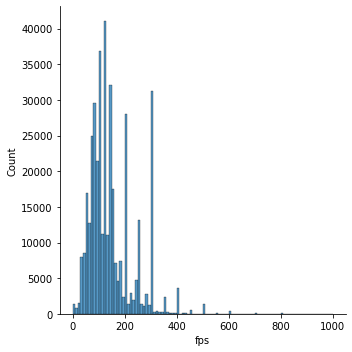

In [40]:
sns.displot(df2.fps,bins=100);

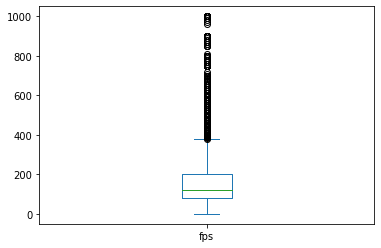

In [41]:
df2.fps.plot(kind='box');

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397989 entries, 0 to 425832
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cpunumberofcores         397989 non-null  int64  
 1   cpunumberofthreads       397989 non-null  int64  
 2   cpubaseclock             397989 non-null  int64  
 3   cpucachel1               397989 non-null  int64  
 4   cpucachel2               397989 non-null  int64  
 5   cpucachel3               397989 non-null  object 
 6   cpufrequency             397989 non-null  int64  
 7   cpumultiplier            397989 non-null  float64
 8   cpumultiplierunlocked    397989 non-null  int64  
 9   cpuprocesssize           397989 non-null  int64  
 10  cputdp                   397989 non-null  int64  
 11  cputurboclock            397989 non-null  int64  
 12  gpuarchitecture          397989 non-null  object 
 13  gpubandwidth             397989 non-null  object 
 14  gpub

In [43]:
df2.select_dtypes("object").columns

Index(['cpucachel3', 'gpuarchitecture', 'gpubandwidth', 'gpubus nterface',
       'gpudiesize', 'gpudirectx', 'gpufp32performance', 'gpumemorybus',
       'gpumemorysize', 'gpumemorytype', 'gpuopencl', 'gpushadermodel',
       'gpunumberofshadingunits', 'gpunumberoftransistors', 'gpuvulkan',
       'gamename', 'gamesetting', 'dataset', 'cpubrand', 'gpubrand'],
      dtype='object')

In [44]:
type_change_list = ["cpucachel3",'gpubandwidth', 'gpudiesize','gpufp32performance', 'gpumemorybus', 
                    'gpumemorysize','gpunumberofshadingunits','gpunumberoftransistors']

In [45]:
for col in type_change_list:
    df2[col]=df2[col].astype("float")

In [46]:
for col in df2.columns:
    print(col,":",df2[col].nunique())

cpunumberofcores : 12
cpunumberofthreads : 14
cpubaseclock : 4
cpucachel1 : 16
cpucachel2 : 14
cpucachel3 : 20
cpufrequency : 36
cpumultiplier : 43
cpumultiplierunlocked : 2
cpuprocesssize : 9
cputdp : 33
cputurboclock : 41
gpuarchitecture : 14
gpubandwidth : 87
gpubaseclock : 123
gpuboostclock : 124
gpubus nterface : 8
gpudiesize : 35
gpudirectx : 2
gpufp32performance : 185
gpumemorybus : 13
gpumemorysize : 13
gpumemorytype : 7
gpuopencl : 4
gpuopengl : 1
gpupixelrate : 169
gpuprocesssize : 5
gpunumberofrops : 10
gpushadermodel : 12
gpunumberofshadingunits : 35
gpunumberoftmus : 28
gputexturerate : 186
gpunumberoftransistors : 36
gpuvulkan : 3
gamename : 30
gameresolution : 3
gamesetting : 4
dataset : 2
fps : 2740
cpubrand : 2
gpubrand : 2


In [47]:
df2.drop("gpuopengl",axis=1,inplace=True)

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397989 entries, 0 to 425832
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cpunumberofcores         397989 non-null  int64  
 1   cpunumberofthreads       397989 non-null  int64  
 2   cpubaseclock             397989 non-null  int64  
 3   cpucachel1               397989 non-null  int64  
 4   cpucachel2               397989 non-null  int64  
 5   cpucachel3               397989 non-null  float64
 6   cpufrequency             397989 non-null  int64  
 7   cpumultiplier            397989 non-null  float64
 8   cpumultiplierunlocked    397989 non-null  int64  
 9   cpuprocesssize           397989 non-null  int64  
 10  cputdp                   397989 non-null  int64  
 11  cputurboclock            397989 non-null  int64  
 12  gpuarchitecture          397989 non-null  object 
 13  gpubandwidth             397989 non-null  float64
 14  gpub

In [49]:
df2.drop("dataset",axis=1,inplace=True)

In [50]:
df2.isnull().sum()

cpunumberofcores           0
cpunumberofthreads         0
cpubaseclock               0
cpucachel1                 0
cpucachel2                 0
cpucachel3                 0
cpufrequency               0
cpumultiplier              0
cpumultiplierunlocked      0
cpuprocesssize             0
cputdp                     0
cputurboclock              0
gpuarchitecture            0
gpubandwidth               0
gpubaseclock               0
gpuboostclock              0
gpubus nterface            0
gpudiesize                 0
gpudirectx                 0
gpufp32performance         0
gpumemorybus               0
gpumemorysize              0
gpumemorytype              0
gpuopencl                  0
gpupixelrate               0
gpuprocesssize             0
gpunumberofrops            0
gpushadermodel             0
gpunumberofshadingunits    0
gpunumberoftmus            0
gputexturerate             0
gpunumberoftransistors     0
gpuvulkan                  0
gamename                   0
gameresolution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

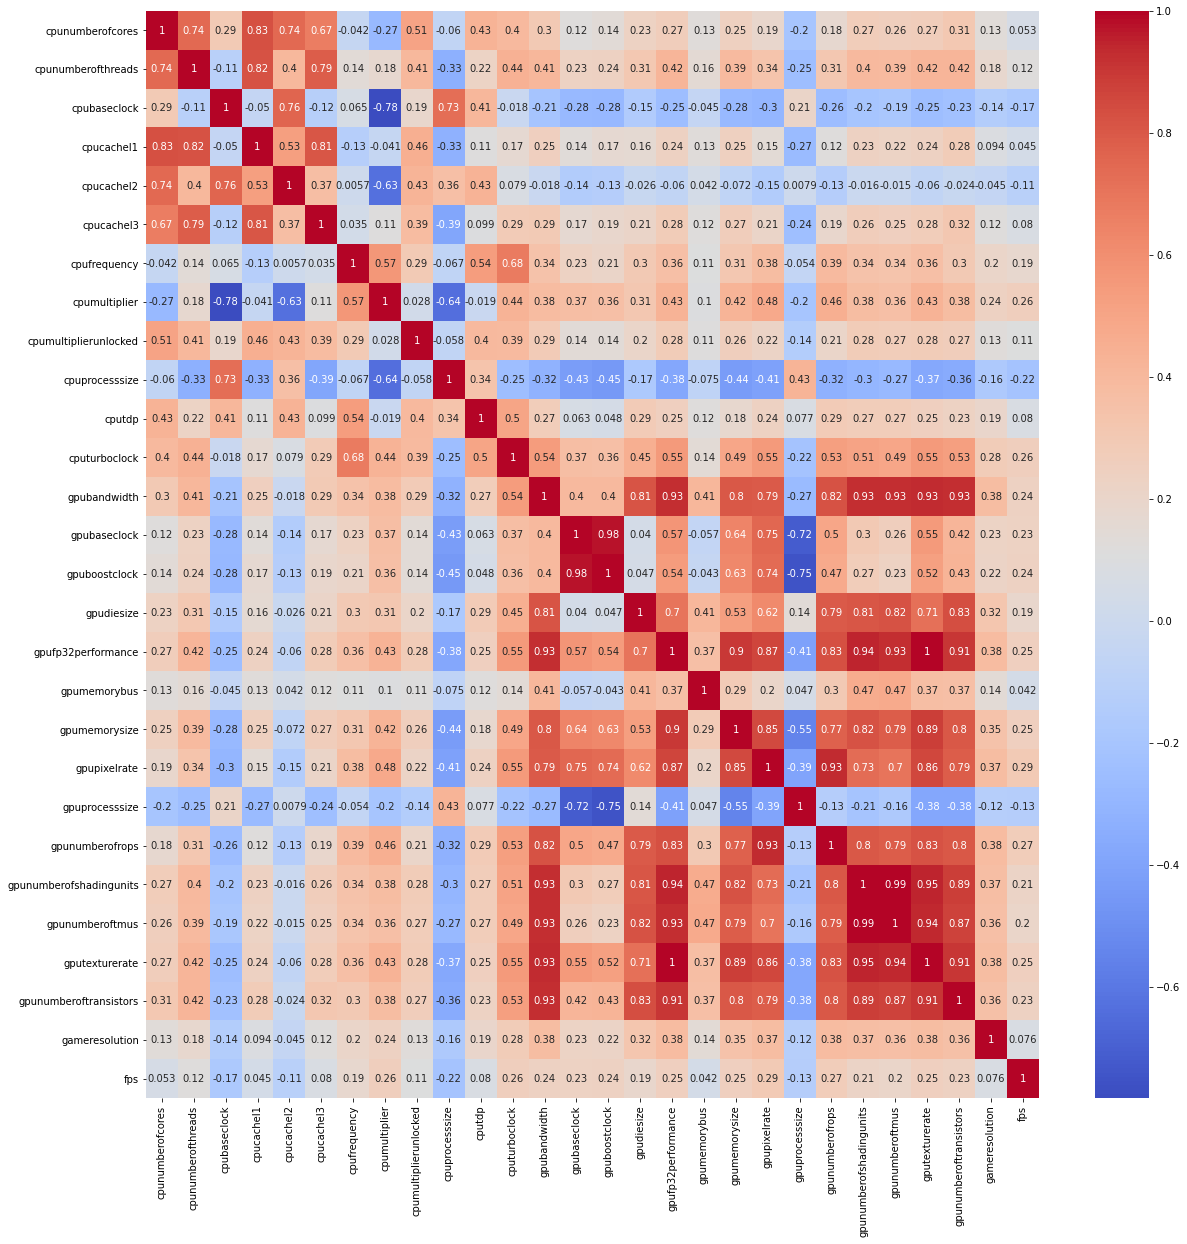

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True,cmap="coolwarm");

# Data Preprocessing

In [52]:
df_dummy = pd.get_dummies(df2,drop_first=True)

<IPython.core.display.Javascript object>

In [53]:
df_dummy

,cpunumberofcores,cpunumberofthreads,cpubaseclock,cpucachel1,cpucachel2,cpucachel3,cpufrequency,cpumultiplier,cpumultiplierunlocked,cpuprocesssize,...,gamename_seaOfThieves,gamename_starcraft2,gamename_totalWar3Kingdoms,gamename_warframe,gamename_worldOfTanks,gamesetting_low,gamesetting_max,gamesetting_med,cpubrand_Intel,gpubrand_NVIDIA
0,4,8,133,256,1024,8.0,2666,20.0,0,45,...,0,0,0,0,0,1,0,0,1,0
1,4,8,133,256,1024,8.0,2666,20.0,0,45,...,0,0,0,0,0,1,0,0,1,0
2,4,4,100,256,1024,6.0,3400,34.0,0,22,...,0,0,0,0,0,1,0,0,1,1
3,4,4,100,256,1024,6.0,3400,34.0,0,22,...,0,0,0,0,0,1,0,0,1,1
4,4,4,100,256,1024,6.0,3400,34.0,0,22,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425828,6,12,100,576,3072,32.0,3600,36.0,1,7,...,0,0,0,0,0,0,1,0,0,0
425829,6,12,100,576,3072,16.0,3600,36.0,1,12,...,0,0,0,0,0,0,1,0,0,0
425830,6,12,100,576,3072,16.0,3600,36.0,1,14,...,0,0,0,0,0,0,1,0,0,0
425831,6,12,100,576,3072,16.0,3400,34.0,1,12,...,0,0,0,0,0,0,1,0,0,0


# Modeling 

In [54]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [55]:
X = df_dummy.drop("fps",axis=1)
y = df_dummy.fps

# Scaling 

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=6)

In [57]:
scaler = MinMaxScaler()

In [58]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multilayer Perceptron Regressor

In [59]:
mlp_reg_mod = MLPRegressor(hidden_layer_sizes=(100,50,50), activation='relu', 
                           solver='adam', alpha=0.001, batch_size='auto', 
                           learning_rate='constant', learning_rate_init=0.01, 
                           power_t=0.5, max_iter=500, shuffle=True, random_state=6, 
                           tol=0.001, verbose=1, warm_start=False, momentum=0.9,
                           nesterovs_momentum=True, early_stopping=True, 
                           validation_fraction=0.2, beta_1=0.9, beta_2=0.999, 
                           epsilon=1e-08, n_iter_no_change=50, max_fun=15000)

* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [60]:
mlp_reg_mod

MLPRegressor(alpha=0.001, early_stopping=True, hidden_layer_sizes=(100, 50, 50),
             learning_rate_init=0.01, max_iter=500, n_iter_no_change=50,
             random_state=6, tol=0.001, validation_fraction=0.2, verbose=1)

In [61]:
mlp_reg_mod.fit(X_train_scaled,y_train)

Iteration 1, loss = 1522.90941254
Validation score: 0.641194
Iteration 2, loss = 1346.62502372
Validation score: 0.653242
Iteration 3, loss = 1332.09081286
Validation score: 0.655101
Iteration 4, loss = 1315.47435854
Validation score: 0.655442
Iteration 5, loss = 1310.04117241
Validation score: 0.604799
Iteration 6, loss = 1307.23199026
Validation score: 0.660588
Iteration 7, loss = 1300.17741482
Validation score: 0.656783
Iteration 8, loss = 1301.93217443
Validation score: 0.660943
Iteration 9, loss = 1294.88613795
Validation score: 0.657005
Iteration 10, loss = 1290.40216542
Validation score: 0.662747
Iteration 11, loss = 1289.62217550
Validation score: 0.661402
Iteration 12, loss = 1283.80809585
Validation score: 0.661431
Iteration 13, loss = 1281.24352851
Validation score: 0.656954
Iteration 14, loss = 1280.52670225
Validation score: 0.664748
Iteration 15, loss = 1274.56248247
Validation score: 0.659379
Iteration 16, loss = 1273.75452198
Validation score: 0.664494
Iteration 17, los

MLPRegressor(alpha=0.001, early_stopping=True, hidden_layer_sizes=(100, 50, 50),
             learning_rate_init=0.01, max_iter=500, n_iter_no_change=50,
             random_state=6, tol=0.001, validation_fraction=0.2, verbose=1)

In [62]:
y_pred = mlp_reg_mod.predict(X_test_scaled)

# Evaluation 

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [64]:
pd.DataFrame([y_pred,y_test],index=["prediction","actual"]).T.sample(20)

<IPython.core.display.Javascript object>

,prediction,actual
14277,113.196708,106.1
6165,273.474292,300.0
20455,272.710551,300.0
14992,100.412878,80.0
6314,96.982301,100.0
35413,70.358453,80.0
30053,231.726356,150.0
8153,199.025128,200.0
32835,94.040710,130.0
17641,160.632735,200.0


In [65]:
mlp_reg_mod.score(X_test_scaled,y_test)

0.6736085414022038

<IPython.core.display.Javascript object>

<AxesSubplot:>

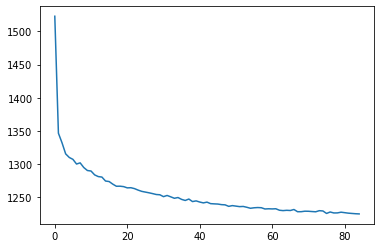

In [66]:
pd.Series(mlp_reg_mod.loss_curve_).plot()

In [67]:
eval_metrics(y_test,y_pred)

<IPython.core.display.Javascript object>

r2_score: 0.6736085414022038 
 mae: 32.367622529733566 
 mse: 2501.023788179928 
 rmse: 50.0102368338716


In [68]:
from sklearn.model_selection import cross_validate

In [69]:
scoring = {    'abs_error': 'neg_mean_absolute_error',
               'squared_error': 'neg_mean_squared_error',
               'r2':'r2'}

scores = cross_validate(mlp_reg_mod, X_train_scaled, y_train, cv=5, scoring=scoring, return_train_score=True, return_estimator = True)

Iteration 1, loss = 1563.07400647
Validation score: 0.646951
Iteration 2, loss = 1368.66663708
Validation score: 0.650362
Iteration 3, loss = 1346.39159913
Validation score: 0.654142
Iteration 4, loss = 1335.71110636
Validation score: 0.630225
Iteration 5, loss = 1327.71656138
Validation score: 0.655754
Iteration 6, loss = 1326.03197175
Validation score: 0.648037
Iteration 7, loss = 1315.12529716
Validation score: 0.653325
Iteration 8, loss = 1309.16559217
Validation score: 0.656933
Iteration 9, loss = 1307.49461819
Validation score: 0.658351
Iteration 10, loss = 1307.91914812
Validation score: 0.653979
Iteration 11, loss = 1303.72459269
Validation score: 0.660948
Iteration 12, loss = 1302.43442191
Validation score: 0.657478
Iteration 13, loss = 1295.16238639
Validation score: 0.656087
Iteration 14, loss = 1293.06271790
Validation score: 0.646086
Iteration 15, loss = 1293.18232017
Validation score: 0.652613
Iteration 16, loss = 1290.64150004
Validation score: 0.651402
Iteration 17, los

Iteration 56, loss = 1243.47577892
Validation score: 0.668032
Iteration 57, loss = 1245.24877760
Validation score: 0.668826
Iteration 58, loss = 1243.71671324
Validation score: 0.668614
Iteration 59, loss = 1245.77313185
Validation score: 0.667932
Iteration 60, loss = 1243.85053840
Validation score: 0.666259
Iteration 61, loss = 1244.12229212
Validation score: 0.668593
Iteration 62, loss = 1241.44760884
Validation score: 0.666903
Iteration 63, loss = 1242.21432431
Validation score: 0.668530
Iteration 64, loss = 1239.52238886
Validation score: 0.667487
Iteration 65, loss = 1240.97405093
Validation score: 0.665239
Iteration 66, loss = 1240.01480248
Validation score: 0.668971
Iteration 67, loss = 1242.18380197
Validation score: 0.667122
Iteration 68, loss = 1238.65620716
Validation score: 0.664336
Iteration 69, loss = 1238.97562424
Validation score: 0.667980
Iteration 70, loss = 1239.72489171
Validation score: 0.661386
Iteration 71, loss = 1237.57527300
Validation score: 0.667301
Iteratio

Iteration 14, loss = 1281.07363997
Validation score: 0.664216
Iteration 15, loss = 1275.73695603
Validation score: 0.665919
Iteration 16, loss = 1276.32095962
Validation score: 0.643081
Iteration 17, loss = 1271.96196500
Validation score: 0.657624
Iteration 18, loss = 1272.89434318
Validation score: 0.665300
Iteration 19, loss = 1270.46300657
Validation score: 0.667491
Iteration 20, loss = 1266.86727799
Validation score: 0.657305
Iteration 21, loss = 1267.56295149
Validation score: 0.667466
Iteration 22, loss = 1265.13616353
Validation score: 0.664108
Iteration 23, loss = 1265.37962752
Validation score: 0.653236
Iteration 24, loss = 1263.24741157
Validation score: 0.667978
Iteration 25, loss = 1261.29231647
Validation score: 0.661363
Iteration 26, loss = 1262.64982169
Validation score: 0.667319
Iteration 27, loss = 1257.87780385
Validation score: 0.667415
Iteration 28, loss = 1257.65166462
Validation score: 0.658216
Iteration 29, loss = 1257.69963407
Validation score: 0.664858
Iteratio

Iteration 63, loss = 1238.52136374
Validation score: 0.671342
Iteration 64, loss = 1236.83972925
Validation score: 0.668197
Iteration 65, loss = 1235.92153459
Validation score: 0.669380
Iteration 66, loss = 1235.73292789
Validation score: 0.661179
Iteration 67, loss = 1235.89205369
Validation score: 0.670460
Iteration 68, loss = 1233.81391832
Validation score: 0.668310
Iteration 69, loss = 1234.42583076
Validation score: 0.670765
Iteration 70, loss = 1235.63115038
Validation score: 0.667804
Iteration 71, loss = 1232.77179140
Validation score: 0.668264
Iteration 72, loss = 1235.19752977
Validation score: 0.669077
Iteration 73, loss = 1232.91126900
Validation score: 0.670822
Iteration 74, loss = 1234.06288743
Validation score: 0.664881
Iteration 75, loss = 1233.61272757
Validation score: 0.669732
Iteration 76, loss = 1232.38174528
Validation score: 0.670009
Iteration 77, loss = 1231.56382048
Validation score: 0.669258
Iteration 78, loss = 1231.86333683
Validation score: 0.669834
Iteratio

In [70]:
pd.DataFrame(scores)

<IPython.core.display.Javascript object>

,fit_time,score_time,estimator,test_abs_error,train_abs_error,test_squared_error,train_squared_error,test_r2,train_r2
0,151.389086,0.149033,"MLPRegressor(alpha=0.001, early_stopping=True,...",-32.273026,-32.137187,-2454.485751,-2489.844825,0.671345,0.672125
1,164.298224,0.152034,"MLPRegressor(alpha=0.001, early_stopping=True,...",-32.401269,-32.061225,-2504.506331,-2462.319714,0.668091,0.674920
2,178.900473,0.151034,"MLPRegressor(alpha=0.001, early_stopping=True,...",-32.390932,-32.059977,-2548.753529,-2453.208347,0.664729,0.675522
3,162.367512,0.153036,"MLPRegressor(alpha=0.001, early_stopping=True,...",-32.232837,-31.975707,-2503.401638,-2448.962484,0.667175,0.676941
4,170.935275,0.173039,"MLPRegressor(alpha=0.001, early_stopping=True,...",-32.564226,-32.125261,-2602.339310,-2447.549096,0.662283,0.675156


#  ML model comparision

In [71]:
from xgboost import XGBRegressor

In [72]:
xgb_model = XGBRegressor()

In [73]:
xgb_model.fit(X_train_scaled,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
y_pred = xgb_model.predict(X_test_scaled)

In [75]:
eval_metrics(y_test,y_pred)

<IPython.core.display.Javascript object>

r2_score: 0.6776484425439466 
 mae: 32.15809675499573 
 mse: 2470.0674362557656 
 rmse: 49.699773000042626


In [76]:
from yellowbrick.regressor import ResidualsPlot

0.6736085414022038

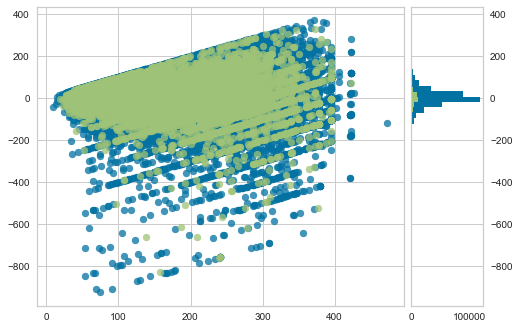

In [77]:
visualizer = ResidualsPlot(mlp_reg_mod)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)

* https://www.statology.org/heteroscedasticity-regression/

# Hyperparameter Tuning 

In [78]:
param_grid = {'hidden_layer_sizes': [(50,50,50), (100,1)],
              'activation': ['relu'],
              'solver': ['adam']}

In [79]:
grid_mod = GridSearchCV(
        MLPRegressor(),
        param_grid,
        cv=2, scoring='neg_mean_squared_error', verbose=5, n_jobs=2)

<IPython.core.display.Javascript object>

In [80]:
grid_result = grid_mod.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


C:\Users\NIO\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [81]:
best_params = grid_result.best_params_

In [82]:
best_params

{'activation': 'relu', 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}